In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def mean(X):
    return np.sum(X, axis=0) / len(X)

In [10]:
def covariance_matrix(X):
    n_samples = len(X)
    X_centered = X - mean(X)
    return np.dot(X_centered.T, X_centered) / (n_samples - 1)

In [41]:
def pca(X):
    X_mean = mean(X)
    print(X_mean)
    X_centered = X - X_mean
    print(X_centered)
    
    #Step 2: Compute covariance matrix
    cov_matrix = covariance_matrix(X_centered)
    
    #Step 4: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    print(eigenvalues)
    print(eigenvectors,"\n")
    
    # Sort eigenvalues and eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[idx]
    sorted_eigenvectors = eigenvectors[:, idx]

    # Select the eigenvector corresponding to the greatest eigenvalue
    greatest_eigenvalue = sorted_eigenvalues[0]
    greatest_eigenvector = sorted_eigenvectors[:, 0]

    print("Greatest Eigenvalue:", greatest_eigenvalue)
    print("Corresponding Eigenvector:", greatest_eigenvector)
    
    # Normalize the greatest eigenvector
    normalized_greatest_eigenvector = greatest_eigenvector / np.linalg.norm(greatest_eigenvector)
    print("Normalized Greatest Eigenvector:", normalized_greatest_eigenvector)
    
    # Project the data onto the new feature space
    transformed_data = np.dot(X_centered, normalized_greatest_eigenvector)
    print("PC:", transformed_data)
    
    return transformed_data

In [48]:
def scatter_plot(data, title):
    plt.scatter(data[:, 0], data[:, 1])
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [44]:
data_2d = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

transformed_data_1d = pca(data_2d)

[5.2 2.6]
[[-3.2 -1.6]
 [-2.2  1.4]
 [-0.2 -2.6]
 [ 1.8  3.4]
 [ 3.8 -0.6]]
[5. 9.]
[[ 0.4472136  -0.89442719]
 [-0.89442719 -0.4472136 ]] 

Greatest Eigenvalue: 9.0
Corresponding Eigenvector: [-0.89442719 -0.4472136 ]
Normalized Greatest Eigenvector: [-0.89442719 -0.4472136 ]
PC: [ 3.57770876  1.34164079  1.34164079 -3.13049517 -3.13049517]


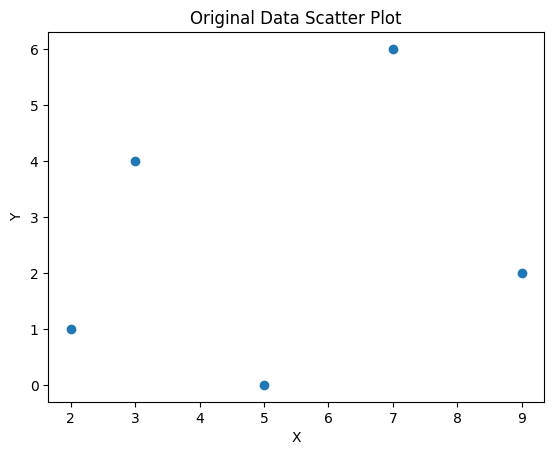

In [49]:
scatter_plot(data_2d, 'Original Data Scatter Plot')

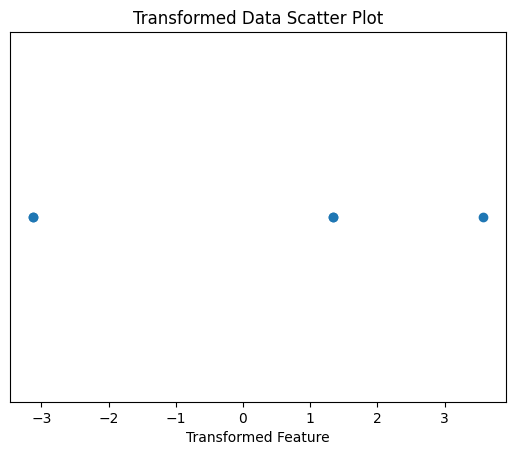

In [50]:
# Scatter plot of transformed data
plt.scatter(transformed_data_1d, np.zeros_like(transformed_data_1d))
plt.title('Transformed Data Scatter Plot')
plt.xlabel('Transformed Feature')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()